In [ ]:
from src.data.spectrum import SpectrumDecomposition
import pandas as pd
import matplotlib.pyplot as plt

# Fourier Transform

## Spectrum Decomposition

In [4]:
tl_add = pd.read_parquet("data/cleaned_data/TL_type_additional_data_cleaned.parquet")
display(tl_add.head())

,axisnumber,id,manipulator,motorposition,speedsetpoint,timeindex,torqueactual,torquefeedforward,type,date,robot_type,robot
6912,1,7600-100440|2022-11-16_09:42:54,TRACK_1,0.0,-0.000000,0.009,0.053306,0.0,TL,2022-11-16,7600,7600-100440
6913,1,7600-100440|2022-11-16_09:42:54,TRACK_1,0.0,0.380452,0.023,-0.093410,0.0,TL,2022-11-16,7600,7600-100440
6914,1,7600-100440|2022-11-16_09:42:54,TRACK_1,0.0,0.380452,0.033,-0.087937,0.0,TL,2022-11-16,7600,7600-100440
6915,1,7600-100440|2022-11-16_09:42:54,TRACK_1,0.0,-0.380452,0.042,0.044531,0.0,TL,2022-11-16,7600,7600-100440
6916,1,7600-100440|2022-11-16_09:42:54,TRACK_1,0.0,-0.000000,0.051,-0.095396,0.0,TL,2022-11-16,7600,7600-100440


In [ ]:
sd = SpectrumDecomposition(col_name="torqueactual", n_freq=25)
tl_type_add_decomposed = sd.transform(tl_add)

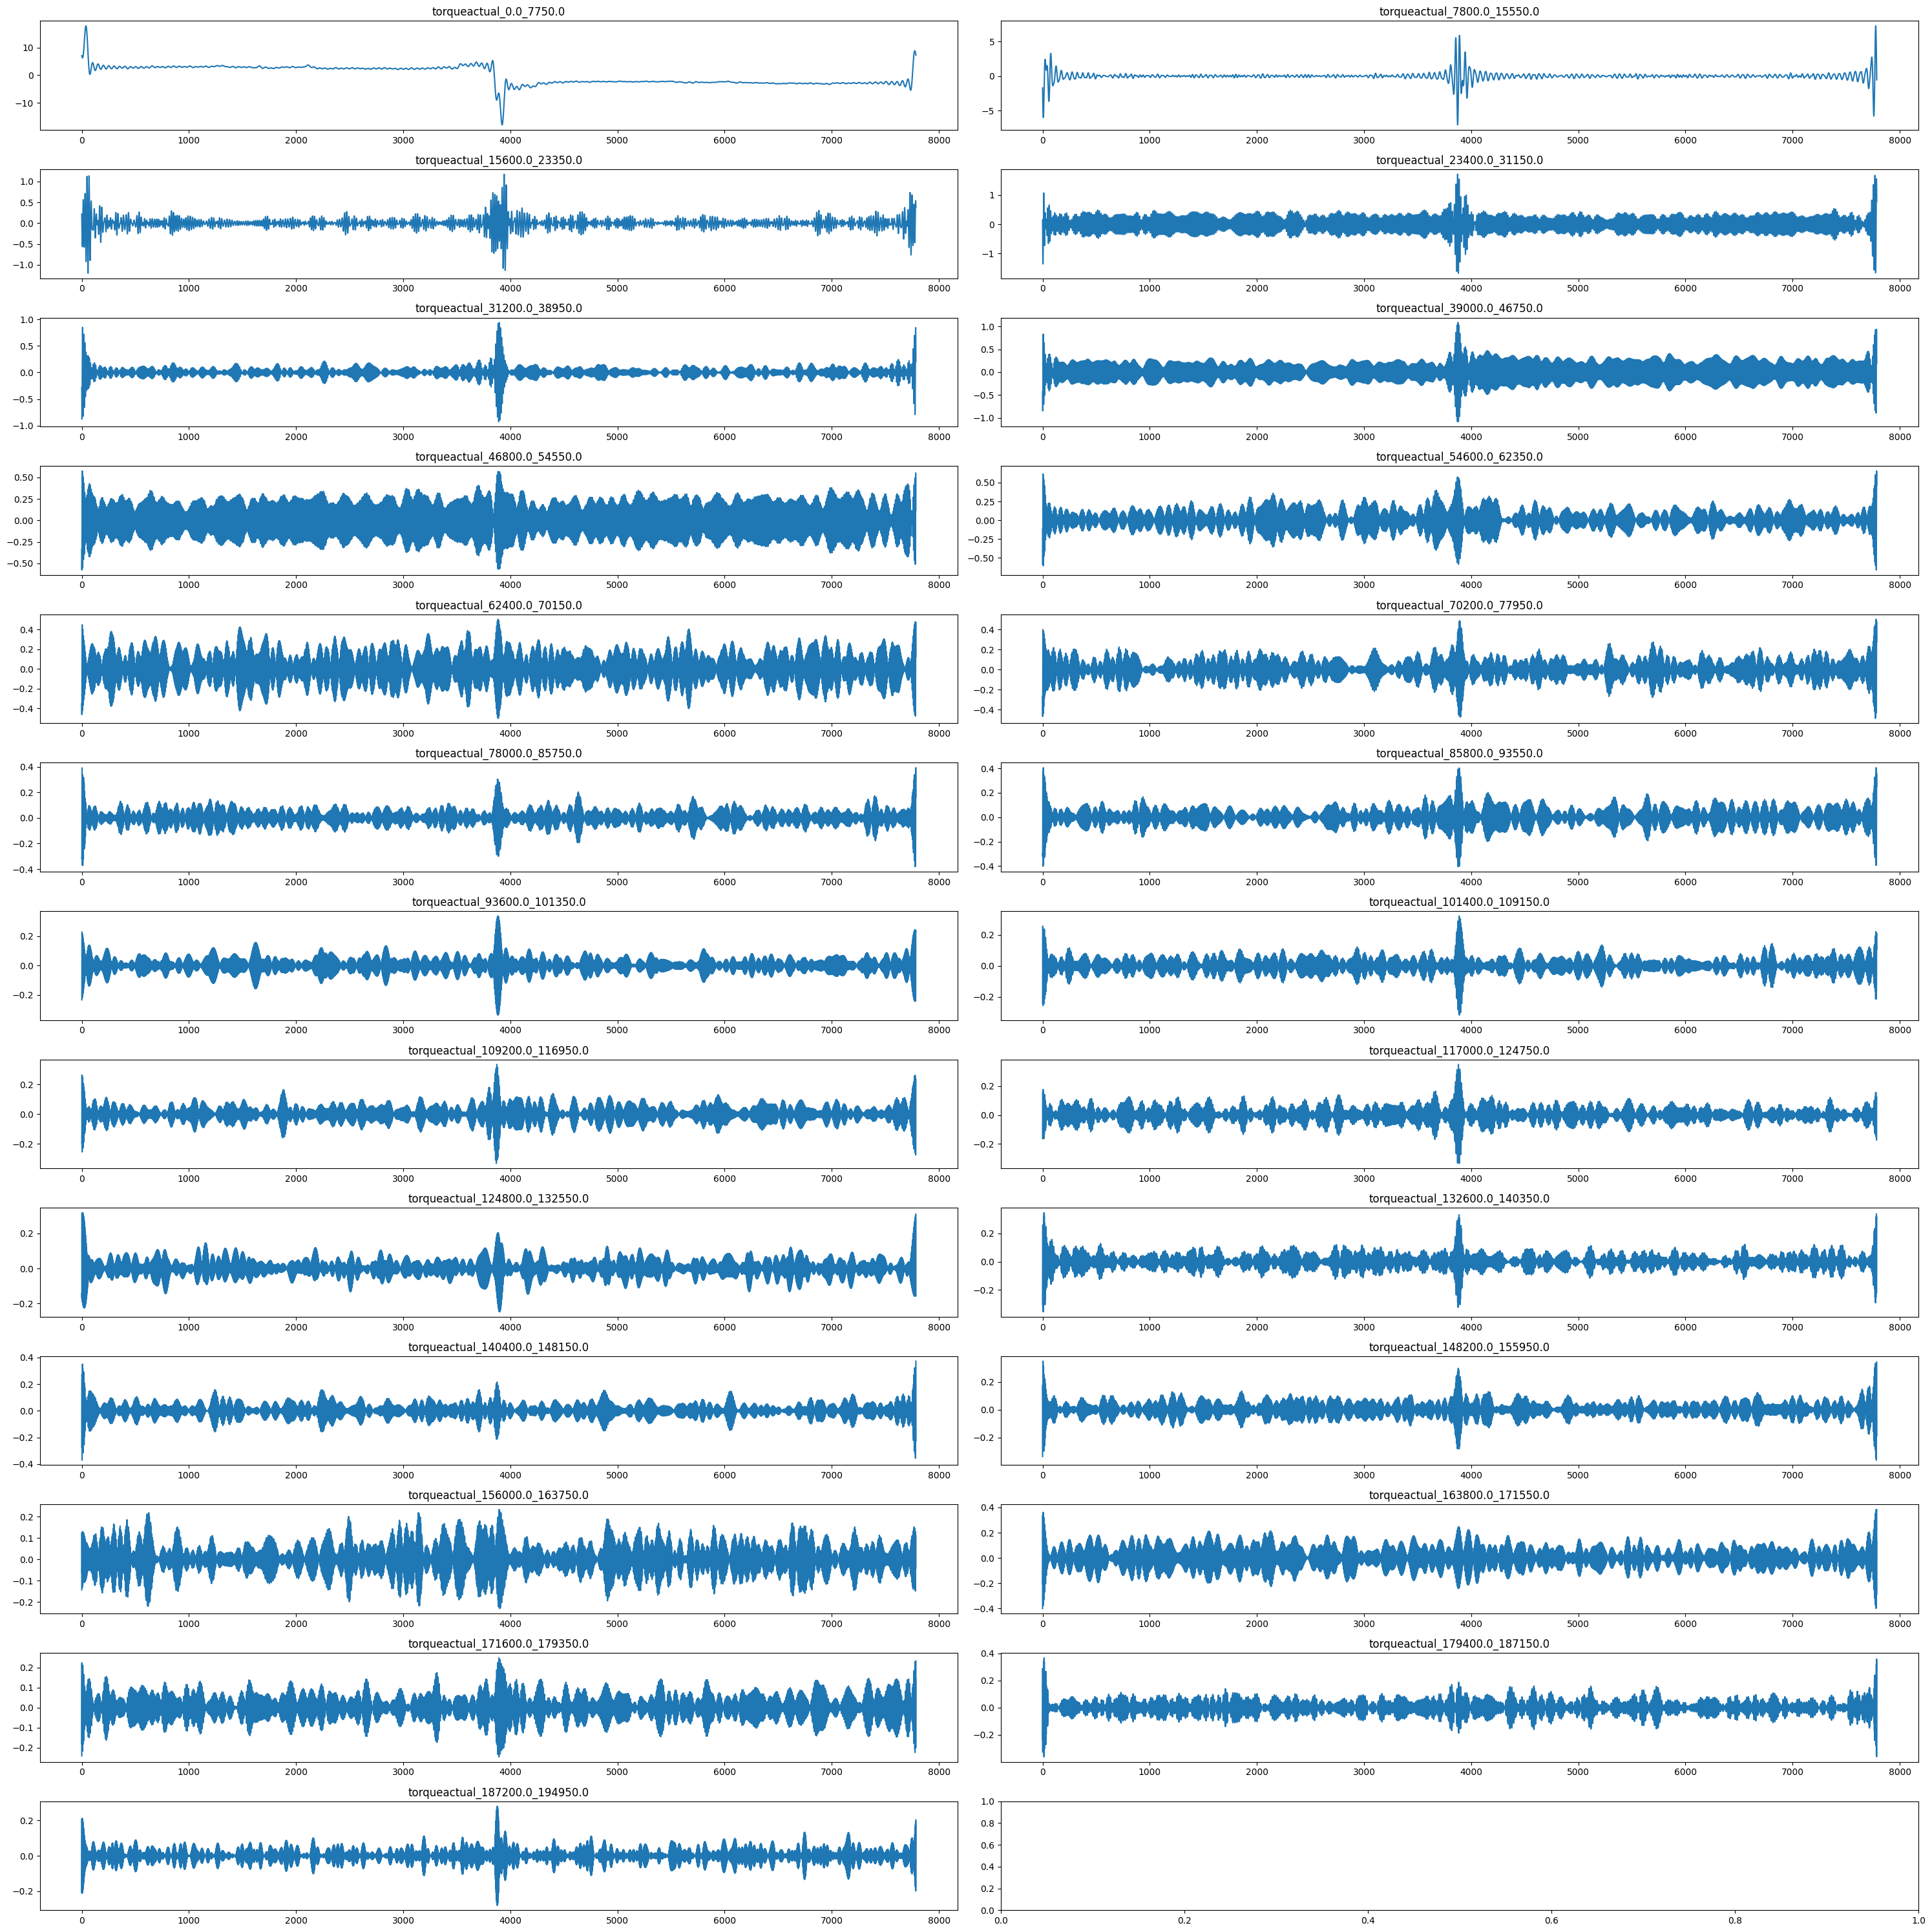

In [36]:
rand_sequence = tl_type_add_decomposed[
    tl_type_add_decomposed["id"] == tl_type_add_decomposed["id"].sample(1).values[0]
]

fig, axes = plt.subplots(13, 2, figsize=(30, 30))
x = [i for i in range(len(rand_sequence))]
for i, col in enumerate(reversed(rand_sequence.columns[3:])):
    axes.flat[i].plot(x, rand_sequence[col])
    axes.flat[i].title.set_text(col)

fig.tight_layout()
plt.show()